In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

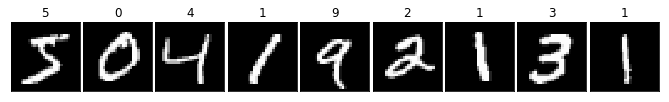

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i+1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape(-1, 784)
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Note**

This `...astype('float32') / 255` is important. Normalizing data makes training faster, at least for MNIST case.
Without this, 10 epoch the acc can only be around `60%` as per current paremeters.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.fit(x_train, y_train,
          batch_size=100, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 1.0508 - acc: 0.7404 - val_loss: 0.4870 - val_acc: 0.8754
Epoch 2/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.4248 - acc: 0.8856 - val_loss: 0.3530 - val_acc: 0.8992
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3439 - acc: 0.9025 - val_loss: 0.3106 - val_acc: 0.9107
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3059 - acc: 0.9129 - val_loss: 0.2786 - val_acc: 0.9201
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2801 - acc: 0.9203 - val_loss: 0.2594 - val_acc: 0.9262
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2603 - acc: 0.9261 - val_loss: 0.2442 - val_acc: 0.9302
Epoch 7/10
60000/60000 [==============================] - 2s 37us/sa

In [6]:
model = Sequential()

model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=100, epochs=10, verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.2560 - acc: 0.9248 - val_loss: 0.1208 - val_acc: 0.9635
Epoch 2/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1009 - acc: 0.9695 - val_loss: 0.0918 - val_acc: 0.9712
Epoch 3/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0690 - acc: 0.9787 - val_loss: 0.0721 - val_acc: 0.9789
Epoch 4/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0511 - acc: 0.9845 - val_loss: 0.0721 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0392 - acc: 0.9876 - val_loss: 0.0661 - val_acc: 0.9810
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0694 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0248 - acc: 0.9920 - val_loss: 0.

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09303538486858161
Test accuracy: 0.9793


In [8]:
classes = model.predict(x_test, batch_size=128)

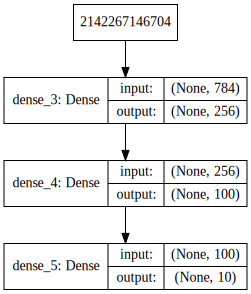

In [9]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 227,670
Trainable params: 227,670
Non-trainable params: 0
_________________________________________________________________
